In [1]:
import neural_net_class_alt as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [7]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [50, 2]
activations = [NNC.sigmoid, NNC.softmax]

# One-hot encode labels
y_train_one_hot = NNC.one_hot_encoder(y_train, 2)
y_test_one_hot = NNC.one_hot_encoder(y_test, 2)


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epsilon=0.01, batch_size=10, epochs=300))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train_one_hot)
y_pred = pipeline.predict(X_test)

# Evauluate the model
accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.7978021978021979
Epoch 100: Accuracy = 0.9692307692307692
Epoch 200: Accuracy = 0.9736263736263736
Test accuracy: 0.9737


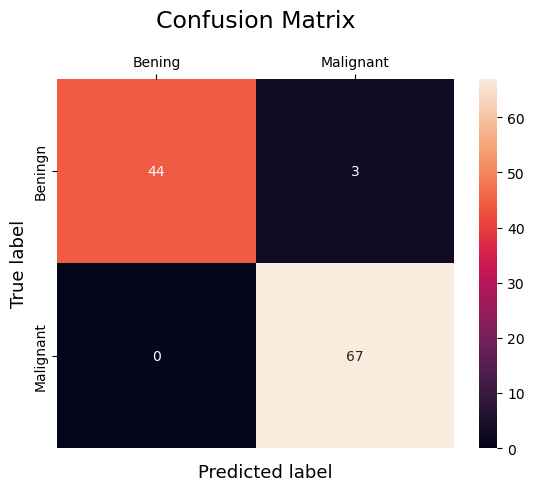

In [8]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()
